## Dataset

1. We use the Bank Marketing Dataset from the UCI Machine Learning Repository.
Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

2. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Originally designed for supervised learning, but we will ignore the label initially

Important Decision:

Even though the dataset contains subscribed (whether the client subscribed to a term deposit), we do not use it to train the clustering model.
We may, however, use it later for interpretation only.

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)


## task 1

### Requirements

The goal of this lab is to **explore the bank dataset, prepare it for clustering, and apply K-Means**.  
Follow these steps carefully and write down your observations.  

### **Exploratory Data Analysis (EDA)** (understanding the dataset and its characteristics)

For each feature, you should:

- Identify **numeric vs categorical features**  
- Check **distributions** of numeric features (min, max, mean, std, skewness)  
- Check **counts of categories** for categorical features  
- Identify **missing or unknown values** and decide how to handle them  
- Look for **correlations** between numeric features  
- Identify **outliers** that may affect clustering  

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables)
 
# X contains the feature variables describing client, campaign, and economic information.
# y contains the target variable indicating whether the client subscribed to a term deposit.

# Although the dataset includes a target variable, it will not be used during clustering since clustering is an unsupervised learning task.

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
# ==============================
# Import Required Libraries
# ==============================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ==============================
# Identify Numeric and Categorical Features
# ==============================

# Select numeric features
numeric_features = X.select_dtypes(include=['number']).columns

# Select categorical features
categorical_features = X.select_dtypes(include=['object', 'string', 'category']).columns

# Print summary
print("Number of Numeric Features:", len(numeric_features))
print("Number of Categorical Features:", len(categorical_features))

print("\nNumeric Features:")
print(list(numeric_features))

print("\nCategorical Features:")
print(list(categorical_features))

Number of Numeric Features: 7
Number of Categorical Features: 9

Numeric Features:
['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

Categorical Features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Summary Statistics for Numeric Features:


,count,mean,std,min,25%,50%,75%,max,skewness
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0,0.684818
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0,8.360308
day_of_week,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0,0.093079
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0,3.144318
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0,4.898650
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0,2.615715
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0,41.846454


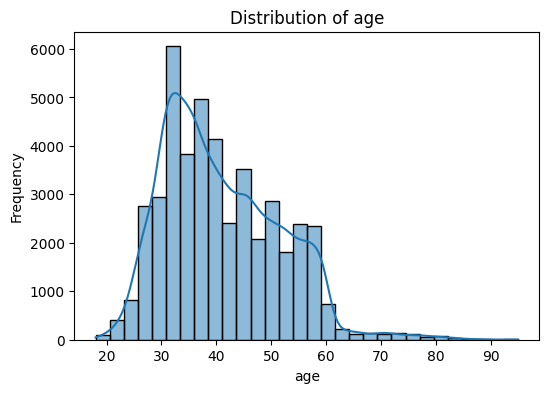

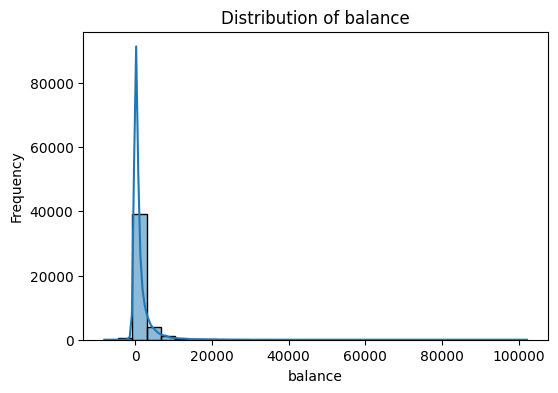

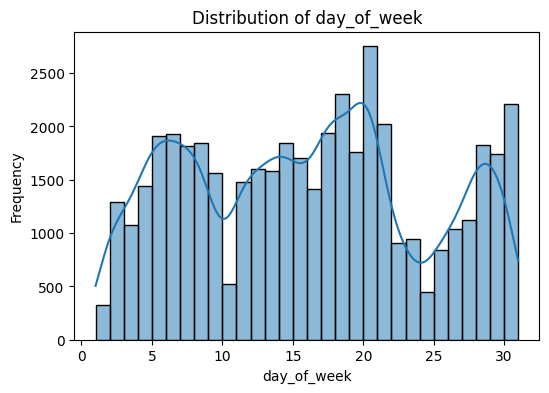

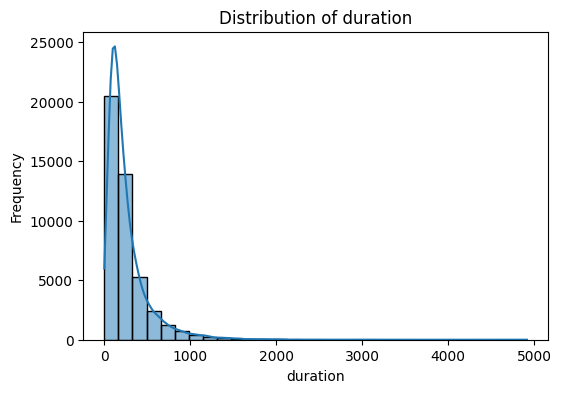

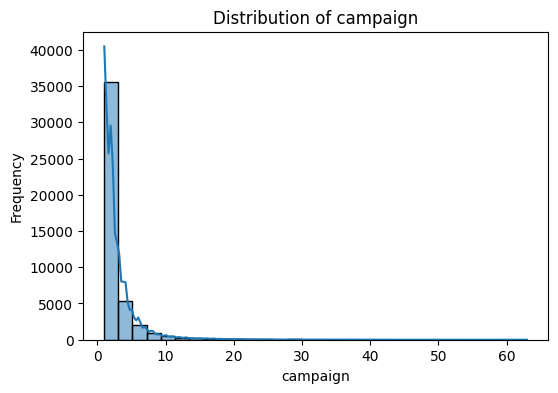

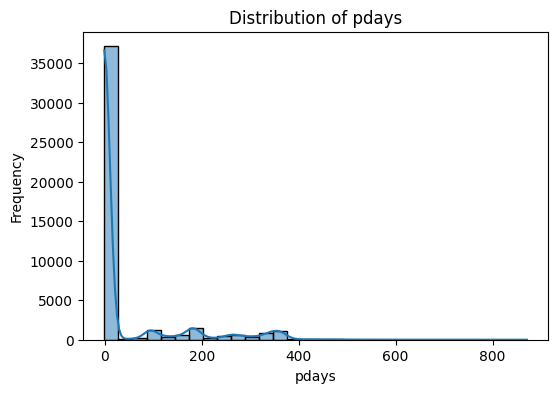

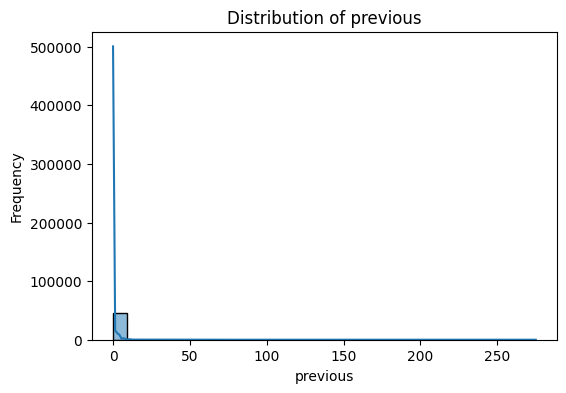

In [4]:
# ==============================
# Numeric Feature Distribution Analysis
# ==============================

# Compute summary statistics for numeric features
summary_stats = X[numeric_features].describe().T

# Add skewness to the summary table
summary_stats['skewness'] = X[numeric_features].skew()

print("Summary Statistics for Numeric Features:")
display(summary_stats)

# ==============================
# Plot Distributions
# ==============================

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Distribution of Numeric Features

# Summary statistics (minimum, maximum, mean, standard deviation, and skewness) 
# were calculated for all numeric features.

# Skewness was examined to identify asymmetric distributions and potential 
# outliers.

# Histograms with kernel density estimation were plotted to visually 
# inspect the distribution shape of each numeric variable.


Categorical Features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Category Counts and Percentages

Feature: job
Number of Unique Categories: 11
               Count  Percentage (%)
job                                 
blue-collar     9732           21.66
management      9458           21.05
technician      7597           16.91
admin.          5171           11.51
services        4154            9.25
retired         2264            5.04
self-employed   1579            3.51
entrepreneur    1487            3.31
unemployed      1303            2.90
housemaid       1240            2.76
student          938            2.09


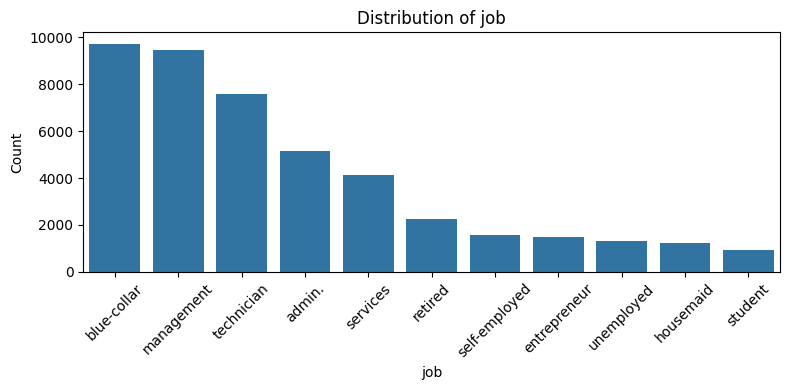


Feature: marital
Number of Unique Categories: 3
          Count  Percentage (%)
marital                        
married   27214           60.19
single    12790           28.29
divorced   5207           11.52


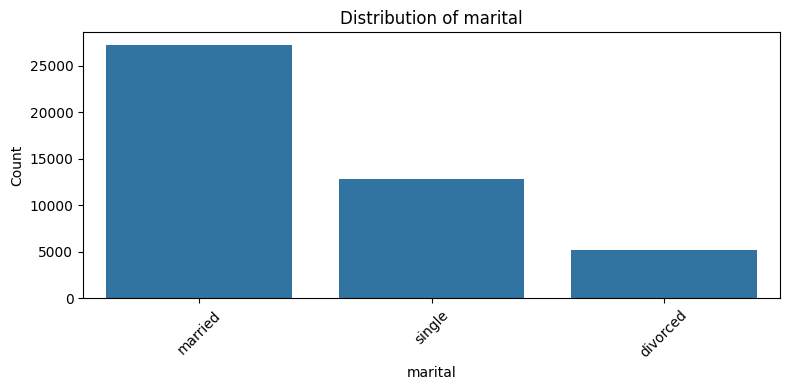


Feature: education
Number of Unique Categories: 3
           Count  Percentage (%)
education                       
secondary  23202           53.52
tertiary   13301           30.68
primary     6851           15.80


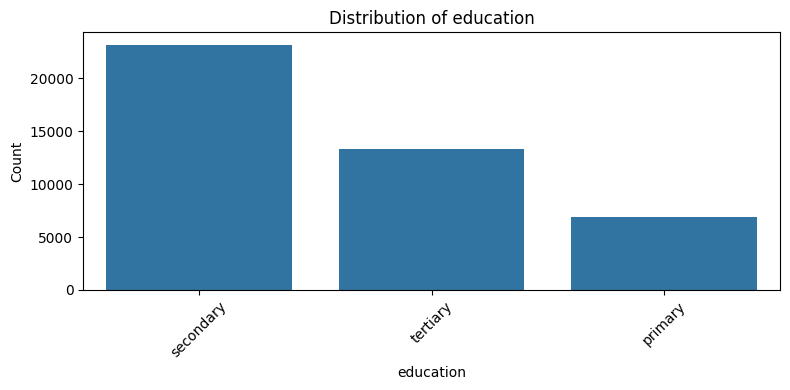


Feature: default
Number of Unique Categories: 2
         Count  Percentage (%)
default                       
no       44396            98.2
yes        815             1.8


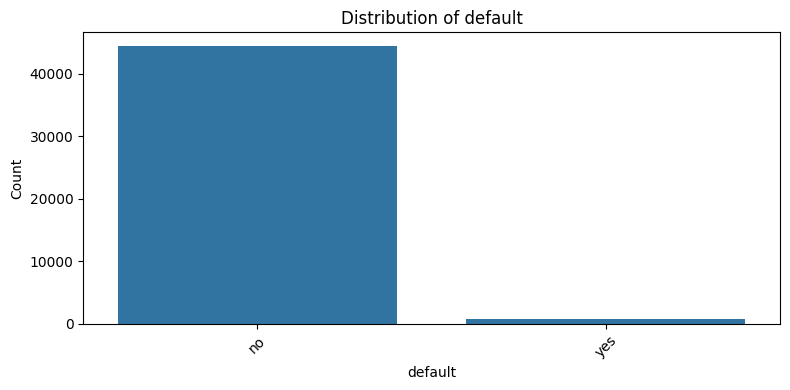


Feature: housing
Number of Unique Categories: 2
         Count  Percentage (%)
housing                       
yes      25130           55.58
no       20081           44.42


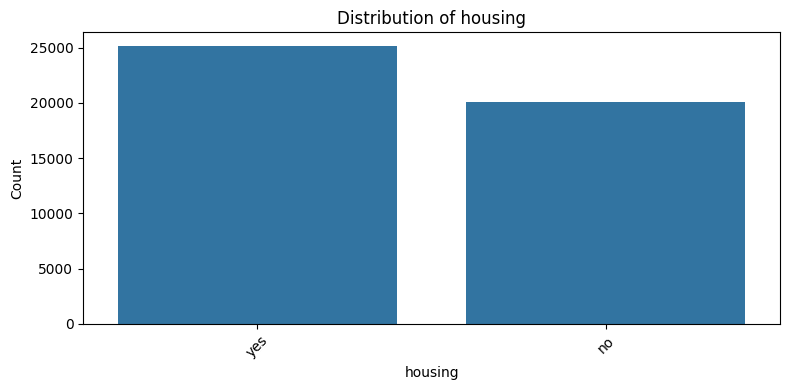


Feature: loan
Number of Unique Categories: 2
      Count  Percentage (%)
loan                       
no    37967           83.98
yes    7244           16.02


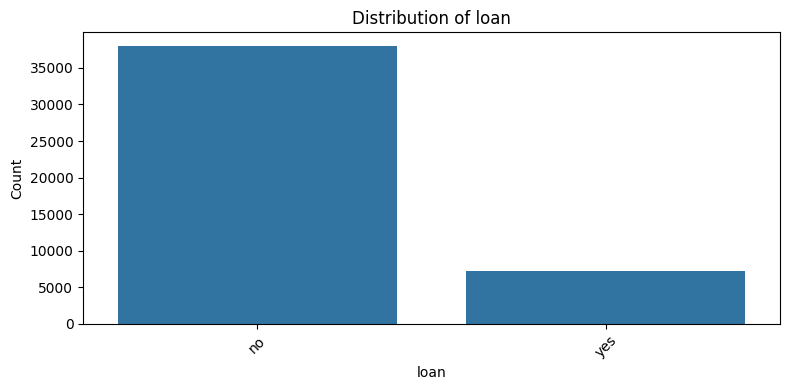


Feature: contact
Number of Unique Categories: 2
           Count  Percentage (%)
contact                         
cellular   29285           90.97
telephone   2906            9.03


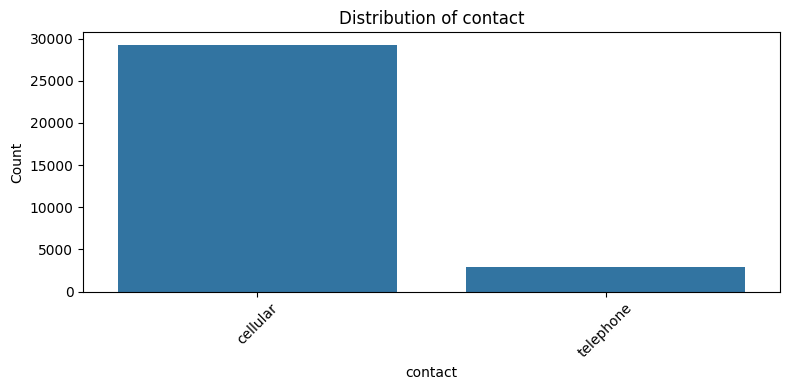


Feature: month
Number of Unique Categories: 12
       Count  Percentage (%)
month                       
may    13766           30.45
jul     6895           15.25
aug     6247           13.82
jun     5341           11.81
nov     3970            8.78
apr     2932            6.49
feb     2649            5.86
jan     1403            3.10
oct      738            1.63
sep      579            1.28
mar      477            1.06
dec      214            0.47


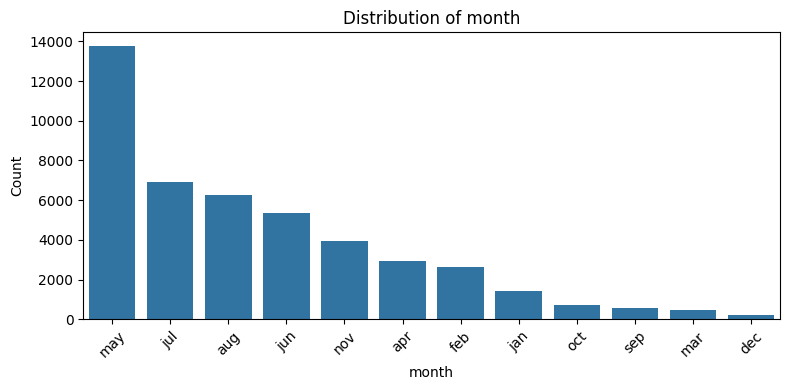


Feature: poutcome
Number of Unique Categories: 3
          Count  Percentage (%)
poutcome                       
failure    4901           59.39
other      1840           22.30
success    1511           18.31


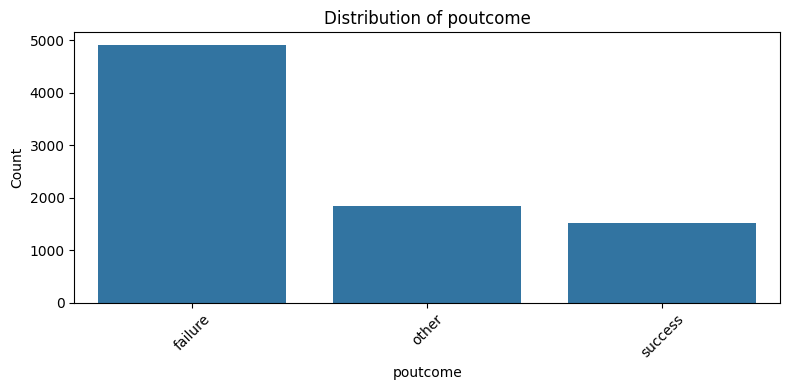

In [5]:
# ==============================
# Categorical Feature Analysis
# ==============================

# Identify categorical features
categorical_features = X.select_dtypes(include=['object', 'string', 'category']).columns

print("Categorical Features:")
print(list(categorical_features))

print("\n==============================")
print("Category Counts and Percentages")
print("==============================")

for col in categorical_features:
    
    print(f"\nFeature: {col}")
    
    # Count unique categories
    print("Number of Unique Categories:", X[col].nunique())
    
    # Compute counts and percentages
    counts = X[col].value_counts()
    percentages = X[col].value_counts(normalize=True) * 100
    
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages.round(2)
    })
    
    print(summary)
    
    # Plot distribution
    plt.figure(figsize=(8,4))
    sns.countplot(data=X, x=col, order=counts.index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
# ==============================
# Missing and Special Value Analysis
# ==============================

#Check for missing (NaN) values
print("Missing Values Per Column:")
print(X.isnull().sum())

#Check for 'unknown' values in categorical features
categorical_features = X.select_dtypes(include=['object', 'string', 'category']).columns

print("\nUnknown Value Counts:")
for col in categorical_features:
    unknown_count = (X[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} unknown values")

#Check special case: pdays = 999
print("\nNumber of pdays = 999 (No previous contact):")
print((X['pdays'] == 999).sum())

# ==============================
# Handle Missing Values
# ==============================

print("\nMissing values before handling:")
print(X.isnull().sum())

# Replace missing categorical values with 'missing'
X[categorical_features] = X[categorical_features].fillna('missing')

print("\nMissing values after handling:")
print(X.isnull().sum())

# Display first few rows
X.head()

### Missing and Special Value Handling
# The dataset was examined for:

# 1. Explicit missing (NaN) values.
# 2. Occurrences of the category "unknown" in categorical variables.
# 3. Special values in `pdays`, where 999 indicates no previous contact.

# Missing values were found in several categorical features. 
# Since clustering is unsupervised and missingness may contain information, 
# missing categorical values were replaced with a new category labeled "missing" 
# rather than removing rows or performing statistical imputation.

# The value 999 in `pdays` represents no previous contact and will later be 
# transformed into a binary indicator.

Missing Values Per Column:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

Unknown Value Counts:

Number of pdays = 999 (No previous contact):
0

Missing values before handling:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

Missing values after handling:
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
con

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,missing,5,may,261,1,-1,0,missing
1,44,technician,single,secondary,no,29,yes,no,missing,5,may,151,1,-1,0,missing
2,33,entrepreneur,married,secondary,no,2,yes,yes,missing,5,may,76,1,-1,0,missing
3,47,blue-collar,married,missing,no,1506,yes,no,missing,5,may,92,1,-1,0,missing
4,33,missing,single,missing,no,1,no,no,missing,5,may,198,1,-1,0,missing


Correlation Matrix:


,age,balance,day_of_week,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day_of_week,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


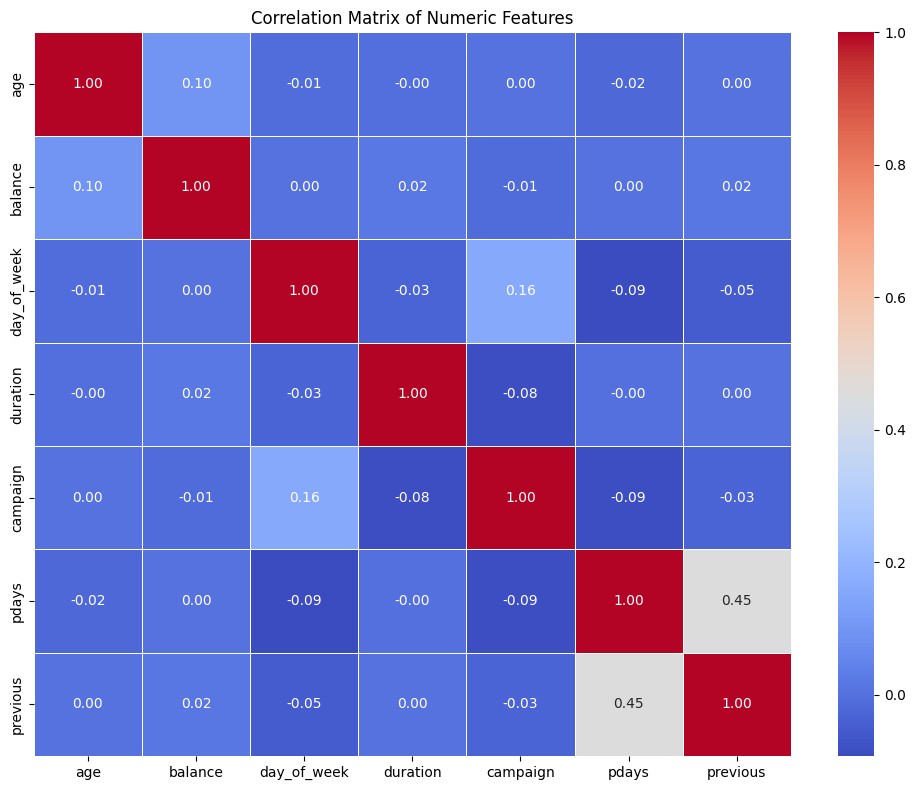

In [ ]:
# ==============================
# Correlation Analysis (Numeric Features)
# ==============================

# Select numeric features
numeric_features = X.select_dtypes(include=['number']).columns

# Compute correlation matrix
correlation_matrix = X[numeric_features].corr()

print("Correlation Matrix:")
display(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# The maximum observed correlation between numeric features was 0.45, 
# which indicates a moderate relationship.

# Since no correlations exceed 0.7 or 0.8, there is no strong multicollinearity 
# among numeric variables. Therefore, all numeric features are retained 
# for clustering without dimensionality reduction.

Number of Potential Outliers per Numeric Feature:
age: 487
balance: 4729
day_of_week: 0
duration: 3235
campaign: 3064
pdays: 8257
previous: 8257


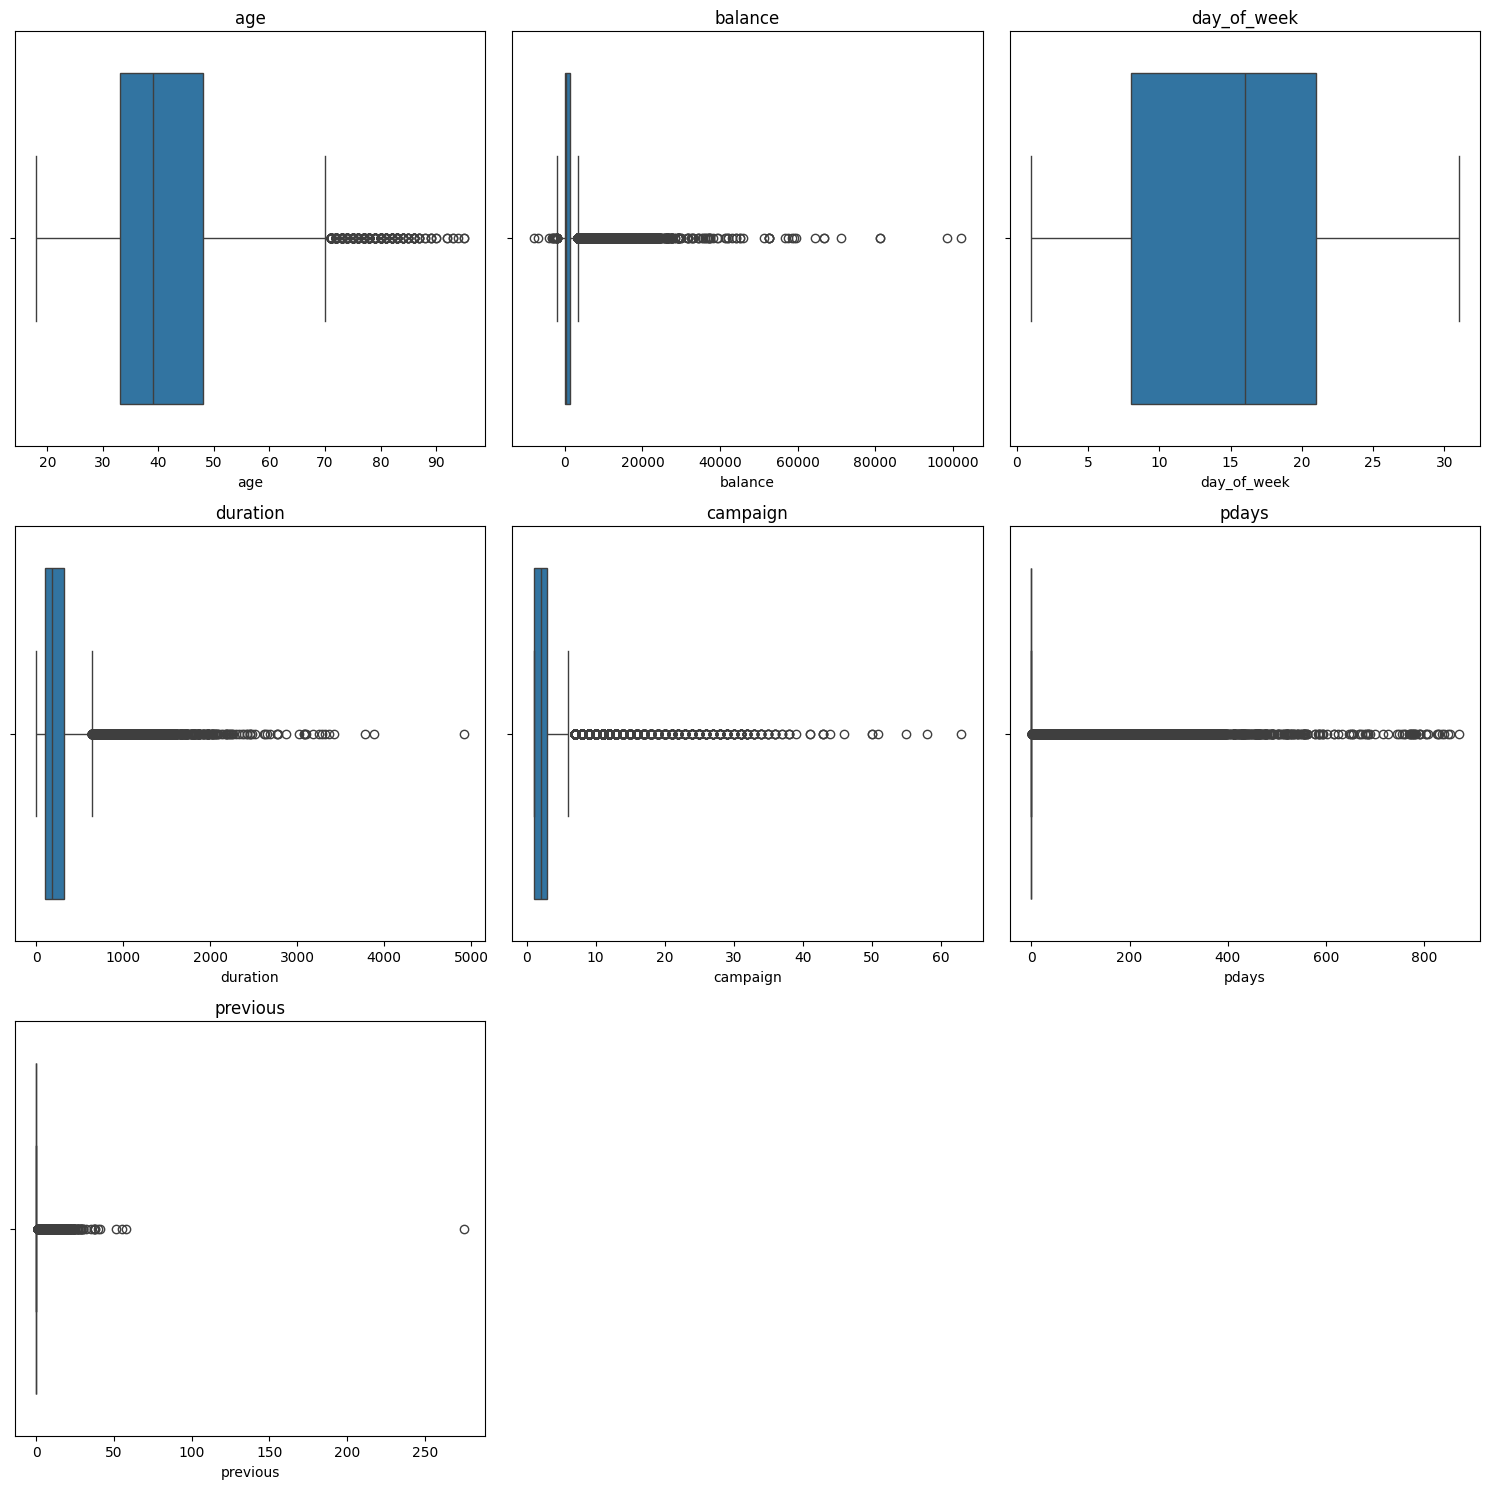

In [8]:
# ==============================
# Outlier Detection 
# ==============================

# Select numeric features
numeric_features = X.select_dtypes(include=['number']).columns

outlier_summary = {}

for col in numeric_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

print("Number of Potential Outliers per Numeric Feature:")
for feature, count in outlier_summary.items():
    print(f"{feature}: {count}")

# ==============================
# Boxplot Visualization
# ==============================

n_cols = 3
n_rows = int(np.ceil(len(numeric_features) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=X[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### **Data Preparation**

Before applying K-Means:

- Drop irrelevant or target columns
- Encode categorical features into numeric format
- Scale numeric features so all are comparable for distance calculations  
- Check that the final dataset has **no missing values** and **all features are numeric**  

In [9]:
# ==============================
# Drop Irrelevant / Target Columns
# ==============================

# The dataset originally contains a target variable (y),
# but clustering is unsupervised, so it must not be used.

if 'y' in X.columns:
    X = X.drop(columns=['y'])

# Drop 'duration' because:
# - It is only known after the call ends
# - It is highly correlated with the outcome
# - Including it would introduce data leakage

if 'duration' in X.columns:
    X = X.drop(columns=['duration'])

print("Remaining columns:")
print(X.columns)

# The target variable was excluded because clustering is an unsupervised
# learning method and does not rely on labeled outcomes.

# The feature `duration` was removed because it is only known after the
# marketing call ends and is strongly related to the subscription outcome.
# Including it would introduce data leakage and unrealistic clustering behavior.

Remaining columns:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='str')


In [10]:
# ==============================
# Encode Categorical Features
# ==============================

# Identify categorical features
categorical_features = X.select_dtypes(include=['object', 'string', 'category']).columns

# Apply One-Hot Encoding
# drop_first=False keeps all categories (recommended for clustering)
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=False)

# Convert boolean columns (True/False) to integers (0/1)
# This ensures all features are numeric
bool_columns = X_encoded.select_dtypes(include=['bool']).columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

# Compare dataset shape before and after encoding
print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)

### Encoding Categorical Features
# Since K-Means requires numeric input, categorical variables were
# converted into numeric format using One-Hot Encoding.

# All categories were retained (drop_first=False) because clustering
# does not involve a dependent variable and removing categories
# is unnecessary.

# Boolean columns resulting from encoding were converted to integers
# (0/1) to ensure full numeric compatibility.

# The dataset dimensionality increased after encoding due to the
# creation of new binary columns.

Shape before encoding: (45211, 15)
Shape after encoding: (45211, 50)


In [13]:
# ==============================
# Feature Scaling
# ==============================
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the encoded dataset and transform it
# This standardizes features to mean = 0 and std = 1
X_scaled = scaler.fit_transform(X_encoded)

print("Shape of scaled data:", X_scaled.shape)

### Feature Scaling

# K-Means clustering relies on Euclidean distance, which is sensitive to
# feature magnitude. Variables with larger numerical ranges can dominate
# distance calculations and distort cluster formation.

# To ensure all features contribute equally, the dataset was standardized
# using StandardScaler. This transformation scales each feature to have
# mean 0 and standard deviation 1.

Shape of scaled data: (45211, 50)


In [14]:
# ==============================
# Final Dataset Validation
# ==============================

# Check total missing values
missing_total = X_encoded.isnull().sum().sum()

# Identify non-numeric columns
non_numeric = X_encoded.select_dtypes(exclude=['number']).columns

print("Total Missing Values:", missing_total)
print("Non-numeric columns:", list(non_numeric))

# Final validation condition
if missing_total == 0 and len(non_numeric) == 0:
    print("\nDataset is ready for K-Means.")
else:
    print("\nDataset still needs cleaning.")

Total Missing Values: 0
Non-numeric columns: []

Dataset is ready for K-Means.


### **Apply K-Means Clustering**

- Decide an initial number of clusters (K)  
- Fit the K-Means model to your prepared dataset  
- Assign each data point to a cluster

In [15]:
# ==============================
# Select Initial Number of Clusters
# ==============================
K = 4
print("Selected number of clusters (K):", K)
### Selection of Number of Clusters (K)
# Based on the Elbow Method, a structural break in SSD reduction
# was observed around K = 4.

# Although the Silhouette Score was highest at K = 2,
# K = 4 provides more meaningful segmentation while still
# maintaining reasonable cluster separation.
# Therefore, K = 4 was selected as the final number of clusters

Selected number of clusters (K): 4


In [16]:
# ==============================
# Fit K-Means Clustering Model
# ==============================

# Initialize K-Means with selected number of clusters
kmeans = KMeans(
    n_clusters=K,
    random_state=42,   # Ensures reproducibility
    n_init=10          # Number of centroid initializations
)

# Fit the model to the scaled dataset
kmeans.fit(X_scaled)

print("K-Means model fitted successfully.")

K-Means model fitted successfully.


In [17]:
# ==============================
# Assign Data Points to Clusters
# ==============================

# Retrieve cluster labels for each observation
cluster_labels = kmeans.labels_

# Add cluster labels to the encoded dataset
X_clusters = X_encoded.copy()
X_clusters['Cluster'] = cluster_labels

# Display cluster distribution
print("Cluster distribution:")
print(X_clusters['Cluster'].value_counts().sort_index())

# Each observation was assigned to one of the K clusters based on
# the nearest centroid in the scaled feature space.

# The cluster labels were added to the dataset for further analysis
# and interpretation.

# The distribution of data points across clusters was examined to
# ensure that no cluster is empty and that segmentation is meaningful.

Cluster distribution:
Cluster
0      815
1     8197
2    21455
3    14744
Name: count, dtype: int64


### **Choosing the Convenient K**

- Use **Elbow Method**: plot Sum of Squared Distances (SSD) vs K  
- Identify the **elbow point** where SSD reduction slows  
- Calculate **Silhouette scores** to validate K  

K = 1, SSD = 2260549.9999999977
K = 2, SSD = 2113723.435281345
K = 3, SSD = 2003046.1119356868
K = 4, SSD = 1915602.8621133897
K = 5, SSD = 1887619.851855001
K = 6, SSD = 1817018.7343741981
K = 7, SSD = 1776580.5869777459
K = 8, SSD = 1725465.9787417862
K = 9, SSD = 1683502.5410025774
K = 10, SSD = 1631668.4751141549
K = 11, SSD = 1592466.695880074
K = 12, SSD = 1566338.7699663986
K = 13, SSD = 1531001.6600602162
K = 14, SSD = 1504217.916348298
K = 15, SSD = 1476146.9089097914
K = 16, SSD = 1441724.4651387169
K = 17, SSD = 1425506.2875803593
K = 18, SSD = 1373673.1352842327
K = 19, SSD = 1356782.0232364764
K = 20, SSD = 1335289.2093149584


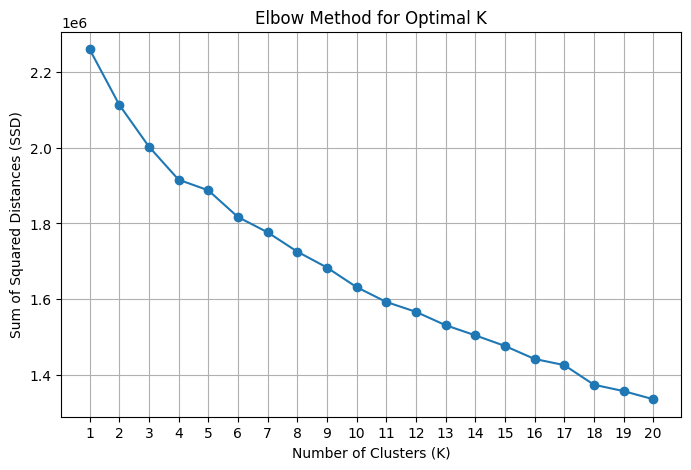

In [ ]:
# ==============================
# Elbow Method for Optimal K
# ==============================

ssd = []
K_range = range(1, 21)  # Evaluate K from 1 to 20

for k in K_range:
    kmeans_temp = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans_temp.fit(X_scaled)
    ssd.append(kmeans_temp.inertia_)  # Inertia = Sum of Squared Distances

# Print SSD values
for k, value in zip(K_range, ssd):
    print(f"K = {k}, SSD = {value}")

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, ssd, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()



In [ ]:

# Compute first differences
ssd_diff = np.diff(ssd)

print("Decrease in SSD between consecutive K values:")
for i, diff in enumerate(ssd_diff, start=1):
    print(f"K={i} to K={i+1}: {abs(diff)}")

### Identification of the Elbow Point (Numerical Analysis)
# The reduction in SSD is substantial from K=1 to K=4:
# - 1→2: 146,826
# - 2→3: 110,677
# - 3→4: 87,443
# However, the decrease from K=4 to K=5 drops significantly
# to 27,983, indicating a sharp slowdown.

Decrease in SSD between consecutive K values:
K=1 to K=2: 146826.56471865252
K=2 to K=3: 110677.32334565837
K=3 to K=4: 87443.24982229713
K=4 to K=5: 27983.010258388706
K=5 to K=6: 70601.11748080282
K=6 to K=7: 40438.14739645226
K=7 to K=8: 51114.60823595966
K=8 to K=9: 41963.437739208806
K=9 to K=10: 51834.06588842254
K=10 to K=11: 39201.77923408081
K=11 to K=12: 26127.925913675455
K=12 to K=13: 35337.10990618239
K=13 to K=14: 26783.743711918127
K=14 to K=15: 28071.0074385067
K=15 to K=16: 34422.443771074526
K=16 to K=17: 16218.177558357595
K=17 to K=18: 51833.15229612659
K=18 to K=19: 16891.112047756324
K=19 to K=20: 21492.813921517925


In [ ]:
# ==============================
# Silhouette Score Calculation
# ==============================

# Evaluate silhouette scores for different values of K
for k in range(2, 21):  # Silhouette requires at least 2 clusters
    kmeans_temp = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    
    # Fit model and predict cluster labels
    labels = kmeans_temp.fit_predict(X_scaled)
    
    # Compute silhouette score
    score = silhouette_score(X_scaled, labels)
    
    print(f"K = {k}, Silhouette Score = {score:.4f}")

### Silhouette Score Interpretation
# Silhouette scores were computed for K values from 2 to 20.
# The highest silhouette score was observed at K = 2 (0.1628),
# indicating the strongest mathematical separation between clusters.
# However, K = 2 results in very broad segmentation and may oversimplify
# the customer structure.

# Although higher K values show moderate improvements,
# they lead to over-fragmentation and reduced interpretability.

# Considering both the Elbow Method (which indicated K = 4)
# and practical interpretability, K = 4 was selected as the final
# number of clusters.
# Silhouette scores remain relatively low overall, which is common
# in high-dimensional datasets with one-hot encoded features.

K = 2, Silhouette Score = 0.1628
K = 3, Silhouette Score = 0.0606
K = 4, Silhouette Score = 0.0666
K = 5, Silhouette Score = 0.0621
K = 6, Silhouette Score = 0.0656
K = 7, Silhouette Score = 0.0756
K = 8, Silhouette Score = 0.0799
K = 9, Silhouette Score = 0.0770
K = 10, Silhouette Score = 0.0968
K = 11, Silhouette Score = 0.0900
K = 12, Silhouette Score = 0.0966
K = 13, Silhouette Score = 0.0948
K = 14, Silhouette Score = 0.0782
K = 15, Silhouette Score = 0.0964
K = 16, Silhouette Score = 0.1126
K = 17, Silhouette Score = 0.0900
K = 18, Silhouette Score = 0.1057
K = 19, Silhouette Score = 0.0861
K = 20, Silhouette Score = 0.0962
